# Prediction of obesity levels based on physical activity and eating habits using a trained neural network model
## Phase 2: Predictive modelling
#### Group Name: Project Group 78
#### Duy Phong Thach - s3821853
#### Tin Trung Pham - s3666652
#### Van Thai Phan - s3818387

## Table of Contents

[Introduction](#itr)

+ [Phase 1 Summary](#Phase1)

+ [Report Overview](#R-Over)

+ [Overview of Methodology](#M-Over)

[Predictive Modelling](#Predict-Mod)

+ [Feature Selection](#Feat-Select)

+ [Model Fitting and Tuning](#Fit-Tune)

+ [Neural Network Model Fitting and Tuning](#Neural-Fit-Tune)

+ [Model Comparison](#Mod-Comp)

[Critique and Limitation](#Crit-and-Lim)

[Summary and Conclusion](#Sum-and-Conc)

+ [Project Summary](#Pro-Sum)
  
+ [Summary of Finding](#Sum-Fin)

+ [Conclusion](#Conc)

[References](#References)

## Phase 1 Summary <a id='Phase1'></a>

In Phase 1 of the report, we chose the following topic: "Prediction of obesity levels based on physical activity and eating habits using a trained neural network model". The report utilised the Obesity Levels dataset from Kaggle (Mehrparvar, 2024). This dataset includes information about estimating obesity levels in Mexico, Peru, and Colombia using the individuals' physical condition and eating habits. 

In phase 1, we mainly concentrated on data preprocessing and cleaning. We decided to retain all the variables in the dataset as it was concluded that all the variables were crucial to maintaining the accuracy of our prediction model. Our preliminary analysis revealed several notable trends within the population studied: a predominant prevalence of overweight and obesity conditions, regular water consumption paired with occasional alcohol intake, and a significant lack of physical activity. Notably, the usage of electronic devices emerged as a potential risk factor for obesity among individuals aged 20-30. Additionally, family history was identified as a contributing factor to obesity levels.

## Report Overview <a id='R-Over'></a>

This case study aims to predict obesity levels in Mexico, Peru, and Colombia using the Obesity Levels dataset from Kaggle (Mehrparvar, 2024). It has 17 features and 2111 records. The 17 features include information like gender, age, height, weight, and family history with obesity, along with information about each individual's eating habits and physical condition like whether an individual consumes high-caloric food frequently or not, frequency of vegetable consumption, smoking habits, etc. Using these features, the records are divided into the following 7 groups: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. Of the 17 features in the dataset, we have narrowed it down to 7 notable features to be used in the prediction process. The report is divided into multiple parts and include all the descriptions and Python codes necessary to complete the prediction.

## Methodology Overview <a id='M-Over'></a>

We used the following classifiers to predict the target feature:

* KNN (K-Nearest Neighbors)
* Gaussian Naive Bayes (NB)
* Decision Tree
* Random Forest

We first start with data preparation. In this step, 'Height' and 'weight' are removed because they can be used to calculate the Body Mass Index (BMI), which directly indicates obesity levels. Furthermore, the dataset is split into descriptive features and the target feature (obesity level). The target variable 'obesity_level' is removed from the descriptive feature dataframe and extracted separately to create the target dataframe. Afterwards, all categorical variables in the descriptive feature dataframe to prepare them for encoding. Since some categorical features are multi-nominal (have more than two categories), one-hot encoding is performed. One-hot encoding transforms categorical variables into a format that can be provided to machine learning algorithms to do a better job in prediction. Each category becomes a new column and is marked with binary values (0 or 1). Then, we encoded the target feature. After that, the best features are selected using: 

* F-Score: Calculate the F-score for each feature. The F-score is a measure of a feature’s relevance, which can help in understanding how much a feature contributes to the prediction.
* Mutual Information: Use mutual information to measure the dependency between each feature and the target variable. Features with higher mutual information are more relevant for predicting the target.
* Random Forest Importance: Train a random forest model and use the feature importance scores it provides. Random forest importance gives a measure of the contribution of each feature to the prediction.
* spFSR (Sequential Floating Forward Selection): Apply advanced feature selection techniques like spFSR to iteratively select the most relevant features by adding and removing features to find the optimal subset.

Then, we conduct a 5-fold stratified cross-validation to fine-tune hyper-parameters of each classifier: 

* K-Nearest Neighbors (KNN): Tune the KNN algorithm by selecting the optimal number of neighbors (k) and other hyperparameters to improve model performance.
* Gaussian Naive Bayes (NB): Tune the Gaussian Naive Bayes classifier, focusing on the prior probabilities and variance smoothing parameters.
* Decision Tree: Tune the decision tree model by adjusting parameters like maximum depth, minimum samples per leaf, and the criterion for splitting nodes.
* Random Forest: Tune the random forest model by adjusting the number of trees, maximum depth, and other hyperparameters to achieve better accuracy and reduce overfitting.

Finally, we identify the best classifiers called 'tuned' classifiers. We compare the performance of these 'tuned' classifiers by using 'paired t-tests', recall scores, and confusion matrices.

In [4]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import io
import requests
pd.set_option('display.max_columns', None) 
#df = df.style.set_precision(3)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
df=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [6]:
df.head()


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
columns_mapping = {
    'Gender': 'gender',
    'Age': 'age',
    'Height': 'height',
    'Weight': 'weight',
    'CALC': 'frequenly_alcohol_consume',
    'FAVC': 'frequenly_high-caloric_food_consume',
    'FCVC': 'vegetable_consumption',
    'NCP': 'main_meal_per_day',
    'SCC': 'calories_in_monitor',
    'SMOKE': 'smoke',
    'CH2O': 'daily_water_consume',
    'SMOKE': 'smoke', 
    'FAF': 'physical_activity_per_week',
    'TUE': 'electronic_device_use_hour',
    'CAEC': 'eating_frequency',
    'MTRANS': 'transport_mode',
    'NObeyesdad': 'obesity_level'

    
}

# rename columns
df = df.rename(columns = columns_mapping)
df.sample(5, random_state=999)

,age,gender,height,weight,frequenly_alcohol_consume,frequenly_high-caloric_food_consume,vegetable_consumption,main_meal_per_day,calories_in_monitor,smoke,daily_water_consume,family_history_with_overweight,physical_activity_per_week,electronic_device_use_hour,eating_frequency,transport_mode,obesity_level
1487,39.126310,Female,1.562889,76.659490,Sometimes,yes,2.000000,3.000000,no,no,1.440526,yes,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I
440,18.000000,Female,1.550000,56.000000,no,yes,2.000000,3.000000,no,no,1.000000,no,0.000000,0.000000,Sometimes,Automobile,Normal_Weight
1060,34.281681,Female,1.673333,77.205685,no,yes,2.689929,1.835543,no,no,1.718569,yes,0.674348,0.707246,Sometimes,Automobile,Overweight_Level_II
875,16.865984,Female,1.644053,67.439589,no,yes,1.314150,1.068196,yes,no,1.364957,yes,0.000000,0.057926,Sometimes,Public_Transportation,Overweight_Level_I
1312,31.641081,Male,1.676595,89.993812,Sometimes,yes,2.934671,2.119682,no,no,2.041462,yes,0.578074,0.000000,Sometimes,Automobile,Obesity_Type_I


 As recommended in phase 1 by the marker, we will remove height and weight because these variables can be used to calculate body max index (BMI), indicating a person's obesity level. 

In [8]:
df=df.drop(columns=['height','weight'])

### SPLITING DATA INTO DESCRIPTIVE FEATURES AND TARGET FEATURE <a id='Split'></a>

Our target is obesity level so we will remove 'obesity_level' variable in cleaned dataset to create descriptive feature dataframe. The target dataframe is created by extracting 'obesity_level' in cleaned dataset

In [9]:
Data=df.drop(columns='obesity_level')
target=df['obesity_level']

In [126]:
target.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

Let's check all categorical variables in descriptive dataframe

In [10]:
categorical_cols= Data.columns[Data.dtypes==object].tolist()
for categorical_col in categorical_cols:
    print('Column ' + categorical_col + ':')
    print(df[categorical_col].value_counts(), '\n')

Column gender:
Male      1068
Female    1043
Name: gender, dtype: int64 

Column frequenly_alcohol_consume:
Sometimes     1401
no             639
Frequently      70
Always           1
Name: frequenly_alcohol_consume, dtype: int64 

Column frequenly_high-caloric_food_consume:
yes    1866
no      245
Name: frequenly_high-caloric_food_consume, dtype: int64 

Column calories_in_monitor:
no     2015
yes      96
Name: calories_in_monitor, dtype: int64 

Column smoke:
no     2067
yes      44
Name: smoke, dtype: int64 

Column family_history_with_overweight:
yes    1726
no      385
Name: family_history_with_overweight, dtype: int64 

Column eating_frequency:
Sometimes     1765
Frequently     242
Always          53
no              51
Name: eating_frequency, dtype: int64 

Column transport_mode:
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: transport_mode, dtype: int64 



## Scaling Descriptive Features

Some categorical features are multi-nominal. We will perform one-hot encoding for all descriptive categorical feature. This method of encoding generates a binary variable for each distinct value of the categorical feature being encoded.

In [11]:

# if a nominal feature has only 2 levels:
# encode it as a single binary variable
for col in categorical_cols:
    n = len(Data[col].unique())
    if n == 2:
        Data[col] = pd.get_dummies(Data[col], drop_first=True)

## for categorical features with >2 levels: use one-hot-encoding
Data = pd.get_dummies(Data)
Data_cols = Data.columns

Let's check all descriptive features after encoding

In [13]:
Data_cols

Index(['age', 'gender', 'frequenly_high-caloric_food_consume',
       'vegetable_consumption', 'main_meal_per_day', 'calories_in_monitor',
       'smoke', 'daily_water_consume', 'family_history_with_overweight',
       'physical_activity_per_week', 'electronic_device_use_hour',
       'frequenly_alcohol_consume_Always',
       'frequenly_alcohol_consume_Frequently',
       'frequenly_alcohol_consume_Sometimes', 'frequenly_alcohol_consume_no',
       'eating_frequency_Always', 'eating_frequency_Frequently',
       'eating_frequency_Sometimes', 'eating_frequency_no',
       'transport_mode_Automobile', 'transport_mode_Bike',
       'transport_mode_Motorbike', 'transport_mode_Public_Transportation',
       'transport_mode_Walking'],
      dtype='object')

After encoding all categorical variables are encoded, we will scale these variables by using Min-Max Scaling for modelling and predicting preparation. Each descriptive feature is scaled to be between 0 and 1

In [14]:
from sklearn import preprocessing

Data_df = Data.copy()

Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(Data)
Data = Data_scaler.fit_transform(Data)

## Encoding Target feature

As discussed in Phase 1, target variable is multinomial, so we have to encode target feature by using labelEncoder()

In [15]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le_fit = le.fit(target)
target_encoded = le_fit.transform(target)

In [16]:
np.unique(target_encoded,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([272, 287, 351, 297, 324, 290, 290]))

We now do spliting data for modelling using train_test_split

In [21]:
from sklearn.model_selection import train_test_split
D_train, D_test, t_train, t_test = train_test_split(Data, target_encoded, test_size = 0.3, random_state=999)

## Feature Selection <a id='Feat-Select'></a>

We will perform cross-validation scoring on full set of features first, and then doing feature selection and ranking using F-score, 
Mutual Information, Random forest importance and spFSR. After that, we will compare performance of feature selection methods using paired t-tests, then choose the best methods for feature selection.


### Full set of features

We will aplly tratified 10-fold cross-validation together with shuffle and set random state to 999 so that our results can be precisely replicated and verified at a later time. Also, we will us accuracy scoring metrics.


In [17]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import feature_selection as fs
cv_method = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)
scoring_metric = 'accuracy'

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import feature_selection as fs
clf = DecisionTreeClassifier(random_state=999)

In [19]:
cv_results_full = cross_val_score(estimator=clf,
                             X=Data,
                             y=target_encoded, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_full

array([0.77830189, 0.72985782, 0.80094787, 0.76777251, 0.76777251,
       0.75829384, 0.78199052, 0.74881517, 0.7535545 , 0.72511848])

In [20]:
cv_perf_full = cv_results_full.mean().round(3)
cv_perf_full

0.761

As you can see, the mean of cross vadidation score for full feature is 0.761. We will choose feature selection methods that produce mean of cross validation score close to or higher than the mean of cross vadidation score for full feature


In [22]:
Data.shape

(2111, 24)

In [23]:
num_features = 9

As you can see, we have totally 24 descriptive features, so our selected number of features in dataset is 9. We then use all feature 
selection methods to pick up the best 9 features for building predictive model. 


### Feature Selection using F-Score

Let's apply F-score and see its best 9 features

In [24]:
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(Data, target_encoded)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]
# Let's see what these top features are
best_features_fscore = Data_df.columns[fs_indices_fscore].values
best_features_fscore

array(['gender', 'family_history_with_overweight',
       'eating_frequency_Sometimes', 'vegetable_consumption',
       'eating_frequency_Frequently', 'age',
       'frequenly_alcohol_consume_Sometimes',
       'frequenly_alcohol_consume_no',
       'frequenly_high-caloric_food_consume'], dtype=object)

We now check score of feature

In [25]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([158.71259473, 146.47712767, 113.45505422, 112.31546187,
       111.68570149,  77.95415423,  57.5973209 ,  50.87227343,
        43.57821646])

In [41]:
cv_results_fscore = cross_val_score(estimator=clf,X=Data[:, fs_indices_fscore],y=target_encoded, 
                                    cv=cv_method, scoring=scoring_metric)
                           
cv_results_fscore.mean().round(3)

0.691

The mean of F-score feature selection is 0.691

### Feature Selection Using Mutual Information

Let's apply Feature selection using mutual information and see its best 9 features

In [27]:
fs_fit_mutual_info = fs.SelectKBest(fs.mutual_info_classif, k=num_features)
fs_fit_mutual_info.fit_transform(Data, target_encoded)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:num_features]
best_features_mutual_info = Data_df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['age', 'vegetable_consumption', 'physical_activity_per_week',
       'daily_water_consume', 'electronic_device_use_hour',
       'main_meal_per_day', 'gender', 'family_history_with_overweight',
       'eating_frequency_Sometimes'], dtype=object)

In [28]:
cv_results_mutual_info = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_mutual_info],
                             y=target_encoded, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_perf_mutual_info = cv_results_mutual_info.mean().round(3)
cv_perf_mutual_info

0.736

The mean of Mutual Information is 0.736

### Random Forest Importance

Applying Random Forest Importance and see its 9 best features

In [29]:
from sklearn.ensemble import RandomForestClassifier
model_rfi = RandomForestClassifier(n_estimators=100, random_state=999)
model_rfi.fit(Data, target_encoded)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]
# Let's see what these top features are
best_features_rfi = Data_df.columns[fs_indices_rfi].values
best_features_rfi

array(['age', 'vegetable_consumption', 'main_meal_per_day',
       'physical_activity_per_week', 'daily_water_consume',
       'electronic_device_use_hour', 'gender',
       'family_history_with_overweight',
       'frequenly_alcohol_consume_Sometimes'], dtype=object)

In [30]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.15267452, 0.1410496 , 0.09407352, 0.09403207, 0.08982886,
       0.08893669, 0.06409432, 0.04899358, 0.03122155])

In [31]:
cv_results_rfi = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_rfi],
                             y=target_encoded, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_perf_rfi = cv_results_rfi.mean().round(3)
cv_perf_rfi

0.748

The mean of Random Forest Importance is 0.748

### Feature Selection using spFSR

Let check 9 best important features of spFSR

In [32]:
from spFSR import SpFSR
sp_engine = SpFSR(x=Data, y=target_encoded, pred_type='c', wrapper=clf, scoring='accuracy')
np.random.seed(999)
sp_output = sp_engine.run(num_features=num_features).results

SpFSR-INFO: Wrapper: DecisionTreeClassifier(random_state=999)
SpFSR-INFO: Hot start: True
SpFSR-INFO: Hot start range: 0.2
SpFSR-INFO: Feature weighting: False
SpFSR-INFO: Scoring metric: accuracy
SpFSR-INFO: Number of jobs: 1
SpFSR-INFO: Number of observations in the dataset: 2111
SpFSR-INFO: Number of observations used: 2111
SpFSR-INFO: Number of features available: 24
SpFSR-INFO: Number of features to select: 9
SpFSR-INFO: iter_no: 0, num_ft: 9, value: 0.728, st_dev: 0.015, best: 0.728 @ iter_no 0
SpFSR-INFO: iter_no: 10, num_ft: 9, value: 0.722, st_dev: 0.027, best: 0.734 @ iter_no 5
SpFSR-INFO: ===> iter_no: 16, same feature stall limit reached, initializing search...
SpFSR-INFO: iter_no: 20, num_ft: 9, value: 0.72, st_dev: 0.021, best: 0.751 @ iter_no 12
SpFSR-INFO: iter_no: 30, num_ft: 9, value: 0.751, st_dev: 0.018, best: 0.756 @ iter_no 27
SpFSR-INFO: ===> iter_no: 33, same feature stall limit reached, initializing search...
SpFSR-INFO: iter_no: 40, num_ft: 9, value: 0.733, st

In [33]:
fs_indices_spfsr = sp_output.get('selected_features')
fs_indices_spfsr

[8, 0, 13, 7, 4, 2, 3, 17, 1]

In [34]:
best_features_spfsr = Data_df.columns[fs_indices_spfsr]
best_features_spfsr

Index(['family_history_with_overweight', 'age',
       'frequenly_alcohol_consume_Sometimes', 'daily_water_consume',
       'main_meal_per_day', 'frequenly_high-caloric_food_consume',
       'vegetable_consumption', 'eating_frequency_Sometimes', 'gender'],
      dtype='object')

In [35]:
feature_importances_spfsr = sp_output.get('selected_ft_importance')
feature_importances_spfsr

array([0.37538792, 0.27820656, 0.21118886, 0.20430728, 0.18454067,
       0.15122169, 0.13168136, 0.06996581, 0.06966016])

In [36]:
cv_results_spfsr = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_spfsr],
                             y=target_encoded, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_spfsr.mean().round(3)

0.763

It's clear to see the mean of spFSR feature selection method is higher than others. Let's compare t-test to confirm the significance of spFSR

In [46]:
from scipy import stats
print(stats.ttest_rel(cv_results_spfsr, cv_results_fscore).pvalue)
print(stats.ttest_rel(cv_results_spfsr, cv_results_mutual_info).pvalue)
print(stats.ttest_rel(cv_results_spfsr, cv_results_rfi).pvalue)
print(stats.ttest_rel(cv_results_spfsr, cv_results_full).pvalue)

7.316557351273007e-06
0.07172534613115955
0.32092869401837937
0.7661463625605587


From the result, we can concluded that spFSR is statistically perform better than F-score methods. But the difference with mutual information and random forest importance are not statistically significant. Compared to full feature selection, the performace of spFSR is not different with 9 features.
However, as the mean level of spFSR is higher, so we decide to go with 9 important features of spFSR

Let's plot 9 important features from spFSR

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

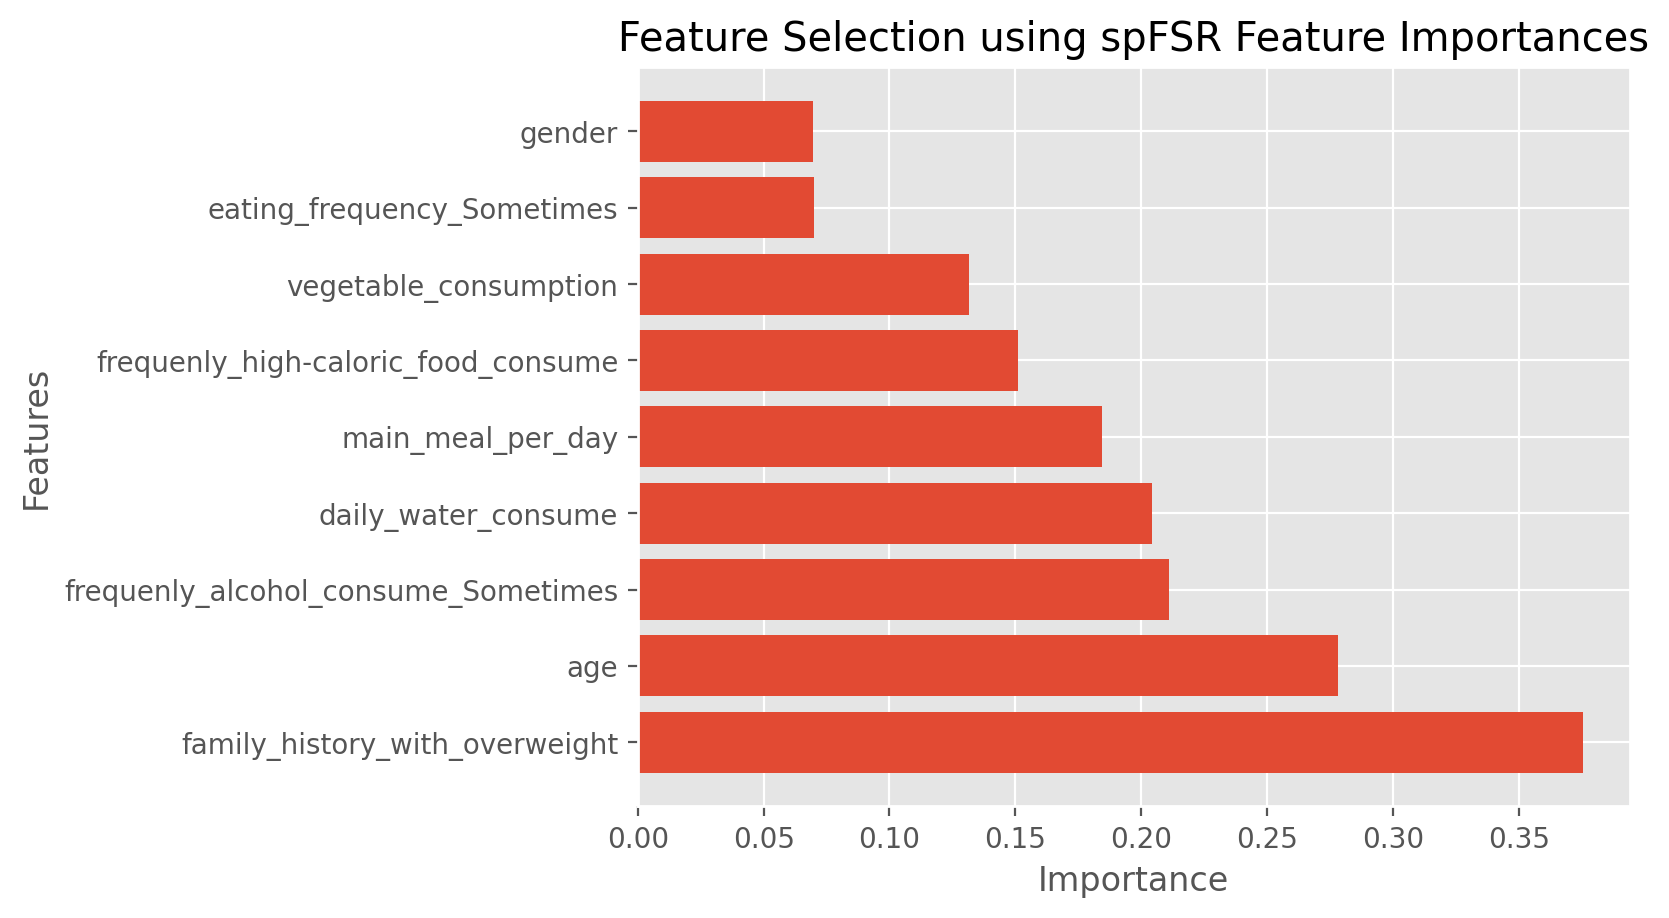

In [48]:
plot_imp(best_features_spfsr, feature_importances_spfsr, 'Feature Selection using spFSR')

We can observe that  "family_history_with_overweight" is the most important features, followed by age. The 9th feature is gender, which has the lowest score.

We will drop unimportant variables in training dataset and testing dataset

In [99]:
D_train_fs = D_train[:, fs_indices_spfsr]
D_test_fs  = D_test[:, fs_indices_spfsr]

## Hyperparameter Tuning <a id='Fit-Tune'></a>

We will implement various cross-validation strategies and grid search to identify optimal hyperparameter values for the 9 best feature selection by spFSR

### Tuning via K-Nearest Neighbors (KNN)

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')


# define a pipeline with two processes
# if you like, you can put MinMaxScaler() in the pipeline as well
params_pipe_KNN_fs = {'fselector__k': [9],
                      'knn__n_neighbors': [1, 2, 3, 4, 5],
                      'knn__p': [1, 2, 5]}
 
pipe_KNN_fs = Pipeline([('fselector', SelectKBest(score_func=f_classif)), 
                        ('knn', KNeighborsClassifier())])

gs_pipe_KNN_fs = GridSearchCV(estimator=pipe_KNN_fs, 
                           param_grid=params_pipe_KNN_fs, 
                           cv=cv_method,
                           n_jobs=-2,
                           scoring='accuracy', 
                           verbose=1)

gs_pipe_KNN_fs.fit(D_train_fs, t_train);

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [93]:
gs_pipe_KNN_fs.best_params_

{'fselector__k': 9, 'knn__n_neighbors': 1, 'knn__p': 1}

In [94]:
gs_pipe_KNN_fs.best_score_

0.7075243610957898

As you can see the optimal KNN model has a mean Accuracy score of 0.707. The best performing KNN with 9 important features by spFSR has 1 nearest neighbors and Manhattan distance (p=1)

In [95]:
gs_pipe_KNN_fs.cv_results_['mean_test_score']

array([0.70752436, 0.69666299, 0.69395109, 0.66960379, 0.66214378,
       0.66077404, 0.6777073 , 0.65873782, 0.6567062 , 0.68314028,
       0.66144972, 0.64792701, 0.67771649, 0.66282405, 0.65130998])

In [97]:
results_pipe_KNN_fs = pd.DataFrame(gs_pipe_KNN_fs.cv_results_['params'])
results_pipe_KNN_fs['test_score'] = gs_pipe_KNN_fs.cv_results_['mean_test_score']
results_pipe_KNN_fs['metric'] = results_pipe_KNN_fs['knn__p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_pipe_KNN_fs.head()

,fselector__k,knn__n_neighbors,knn__p,test_score,metric
0,9,1,1,0.707524,Manhattan
1,9,1,2,0.696663,Euclidean
2,9,1,5,0.693951,Minkowski
3,9,2,1,0.669604,Manhattan
4,9,2,2,0.662144,Euclidean


Let's visualize performance of Manhattan, Euclidean and Minknowski

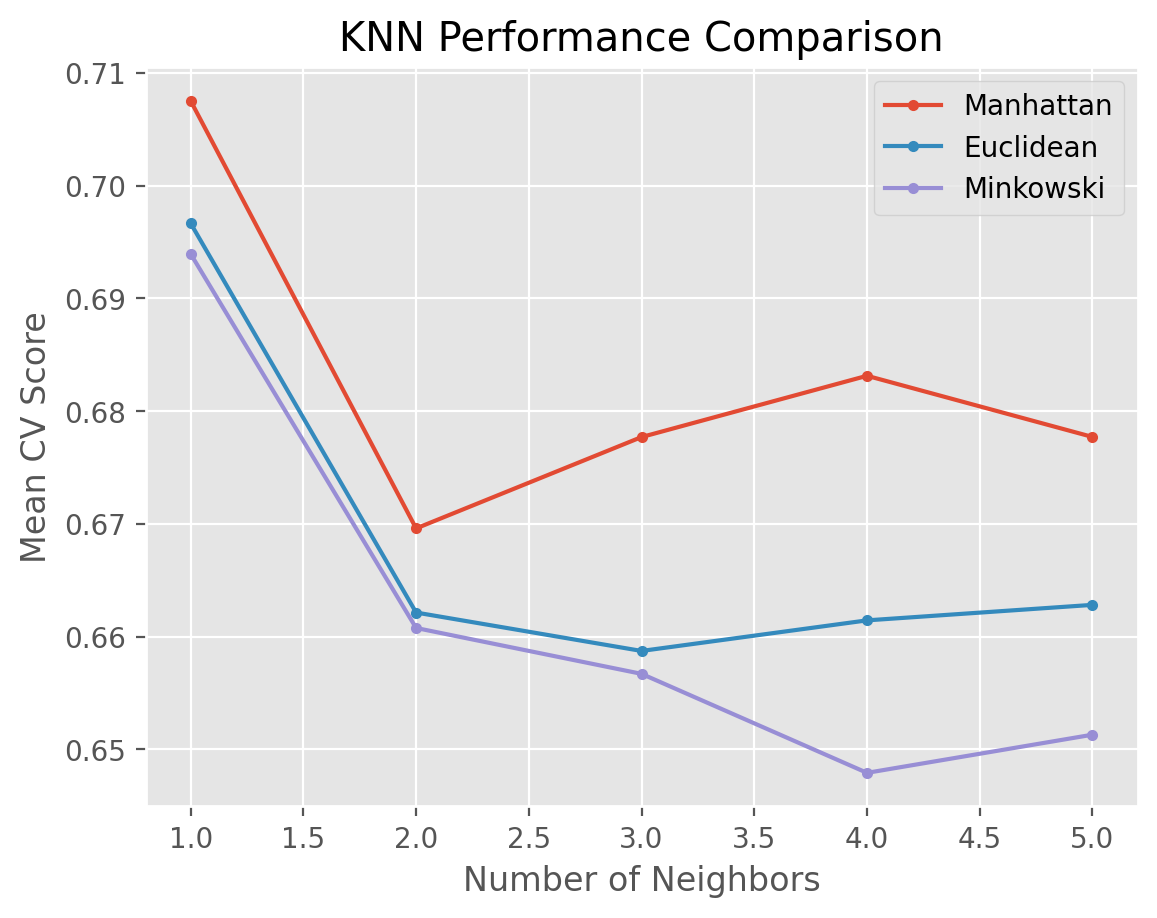

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

for i in ["Manhattan", "Euclidean", "Minkowski"]:
    temp = results_pipe_KNN_fs[results_pipe_KNN_fs['metric'] == i]
    plt.plot(temp['knn__n_neighbors'], temp['test_score'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean CV Score")
plt.title("KNN Performance Comparison")
plt.show()

As you can see the Manhattan outperform the other 2 metrics, given number of neighbor up to 5 with 9 important features

### Tuning via Gaussian NB and visualization

We now fit the Gaussian Naives Bayes model and select optimal parameter of var_smoothing for 9 selected important features by spFSR. We will use power transformation (Power Transformer method) to make all descriptive feature follow Faussian distribution. 

In [103]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer


pipe_NB_fs = Pipeline([('fselector', SelectKBest(score_func=f_classif)),
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())])

params_pipe_NB_fs = {'fselector__k': [9],
                  'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1],
                }

gs_pipe_NB_fs = GridSearchCV(estimator=pipe_NB_fs, 
                     param_grid=params_pipe_NB_fs, 
                     cv=cv_method,
                     verbose=1, 
                     scoring=scoring_metric)

D_train_fs_transformed = PowerTransformer().fit_transform(D_train_fs)

gs_pipe_NB_fs.fit(D_train_fs_transformed, t_train);

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [104]:
gs_pipe_NB_fs.best_params_

{'fselector__k': 9, 'nb__var_smoothing': 0.1}

In [105]:
gs_pipe_NB_fs.best_score_

0.5118955690384263

The optimal NB is only  0.512 for 9 important features , which is very low compared to KNN. But we need to use paired t-test to confirm it

In [106]:
# Let's define a new data frame to store the NB grid search results for visualization
results_pipe_NB_fs = pd.DataFrame(gs_pipe_NB_fs.cv_results_['params'])
results_pipe_NB_fs['test_score'] = gs_pipe_NB_fs.cv_results_['mean_test_score']

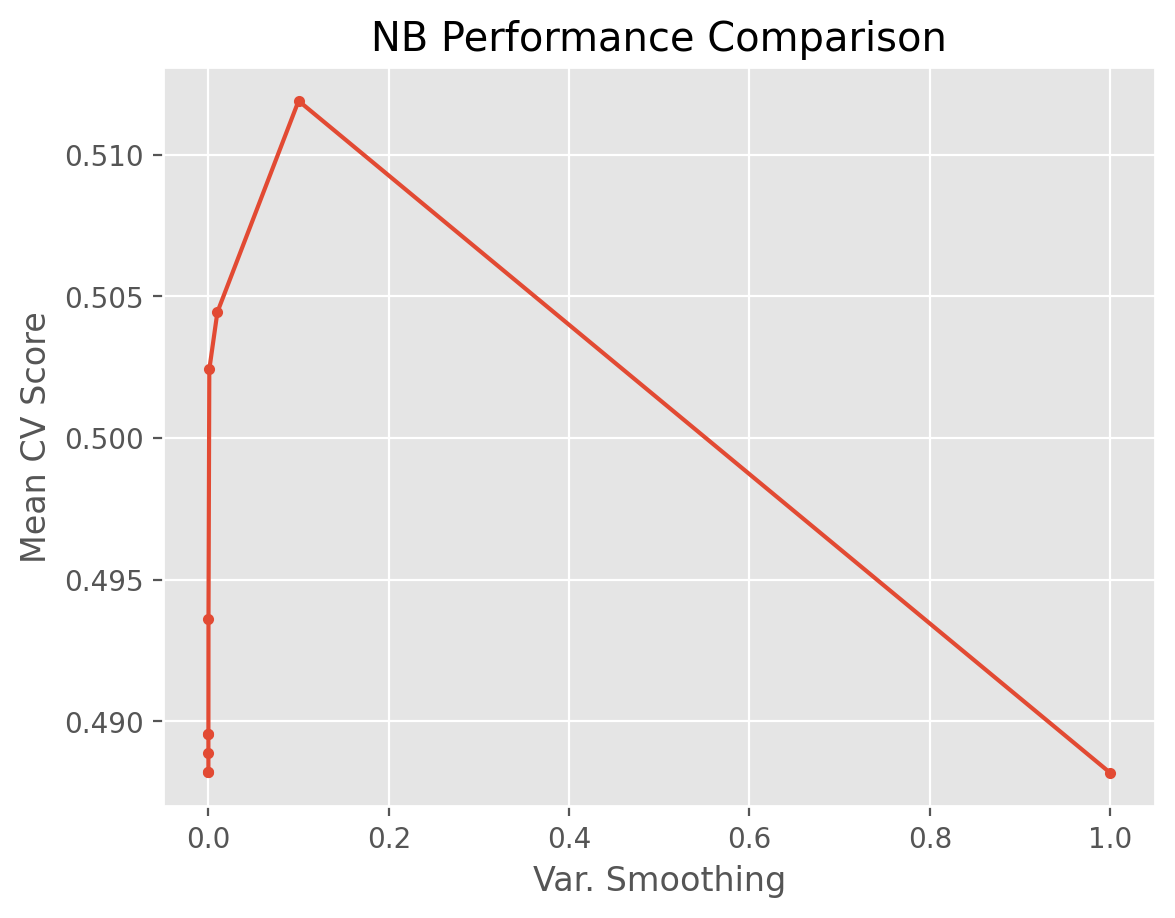

In [107]:
plt.plot(results_pipe_NB_fs['nb__var_smoothing'], results_pipe_NB_fs['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

### Decision Trees Tuning and Visualization

For decision trees (DT), we want to find the best criterion (gini or entropy) as well as optimal maximum depth and minimum sample split for the 9 best important features

In [62]:
from sklearn.tree import DecisionTreeClassifier

df_classifier = DecisionTreeClassifier(random_state=999)

params_pipe_DT_fs = {'fselector__k': [9],
            'dt__criterion': ['gini', 'entropy'],
            'dt__max_depth': [3, 5, 7, 10, 24, 30],
             'dt__min_samples_split': [2, 5, 15, 20, 25]}

pipe_DT_fs = Pipeline([('fselector', SelectKBest(score_func=f_classif)), 
                    ('dt', df_classifier)])
gs_pipe_DT_fs  = GridSearchCV(estimator=pipe_DT_fs, 
                           param_grid=params_pipe_DT_fs, 
                           cv=cv_method,
                           n_jobs=-2,
                           scoring='accuracy', 
                              refit=True,
                           verbose=1)
gs_pipe_DT_fs.fit(D_train_fs, t_train);

Fitting 10 folds for each of 60 candidates, totalling 600 fits


In [63]:
gs_pipe_DT_fs.best_params_

{'dt__criterion': 'entropy',
 'dt__max_depth': 24,
 'dt__min_samples_split': 2,
 'fselector__k': 9}

In [64]:
gs_pipe_DT_fs.best_score_

0.7243794815223386

As you can see, with the given 9 important features, the best DT should go with entropy criterion, maximum depth of 24 and min sample split of 2. The best decision trees score is 0.724.

Now, let's visualize and compare performance of DT when applying gini and entropy method

In [108]:
results_pipe_DT = pd.DataFrame(gs_pipe_DT_fs.cv_results_['params'])
results_pipe_DT['test_score'] = gs_pipe_DT_fs.cv_results_['mean_test_score']
results_pipe_DT.columns

Index(['dt__criterion', 'dt__max_depth', 'dt__min_samples_split',
       'fselector__k', 'test_score'],
      dtype='object')

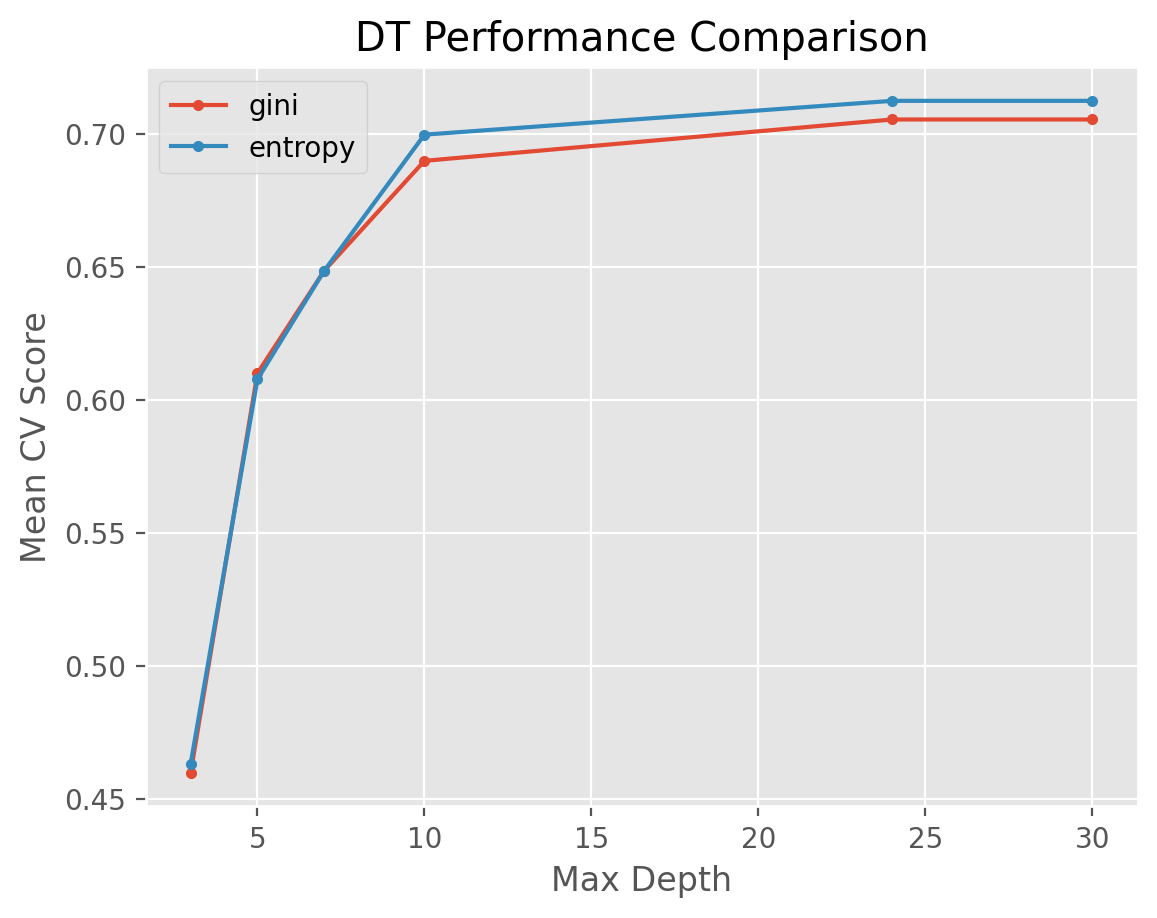

In [109]:
for i in ['gini', 'entropy']:
    temp = results_pipe_DT[results_pipe_DT['dt__criterion'] == i]
    temp_average = temp.groupby('dt__max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

We also visulize performance comparison for different min sample split

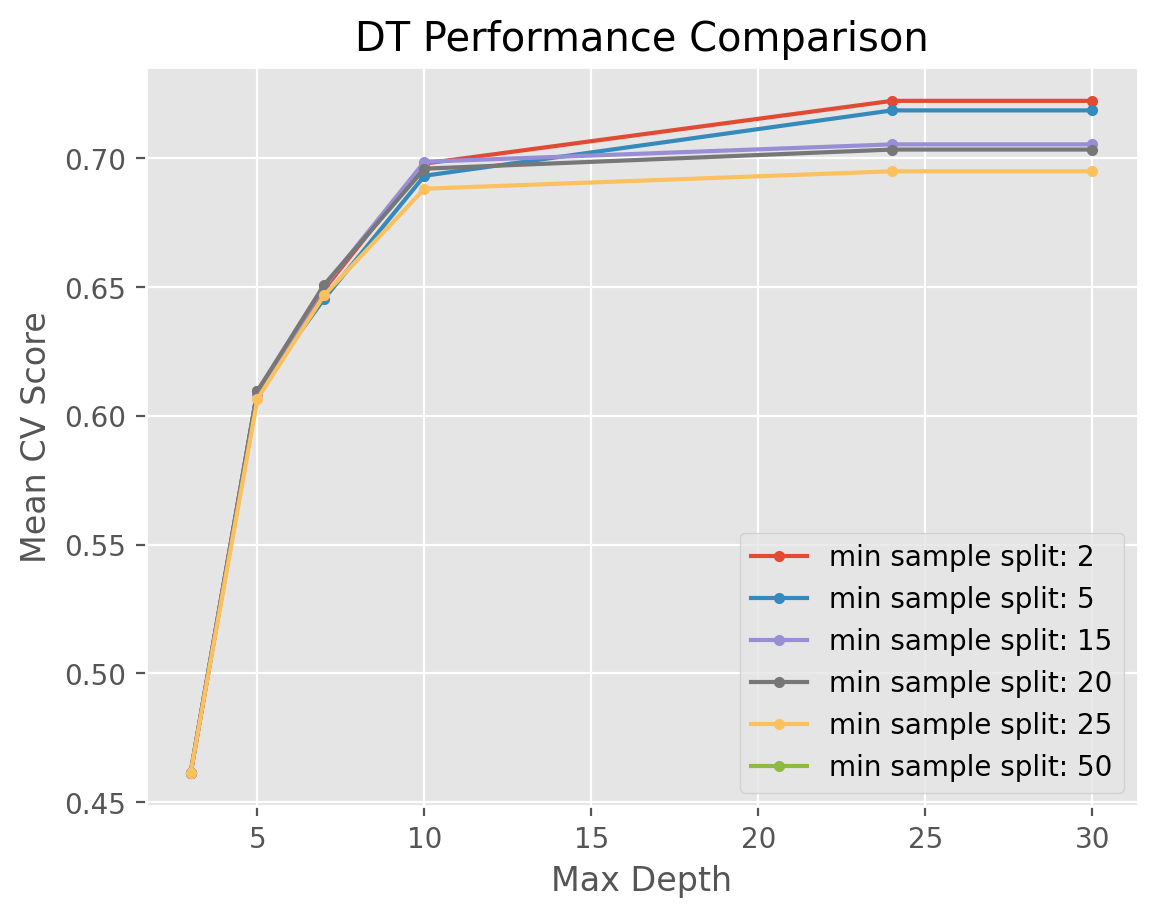

In [111]:
for i in [2, 5, 15, 20, 25,50]:
    temp = results_pipe_DT[results_pipe_DT['dt__min_samples_split'] == i]
    temp_average = temp.groupby('dt__max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = 'min sample split: ' + str(i))
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

### Random Forest Tuning and Visualization

For Random Forest, we look for te optimal number of estimators and maximum depth parameter for the given 9 best important features

In [112]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier

pipe_RF_fs = Pipeline([('fselector', SelectKBest(score_func=f_classif)),\
                       ('rf', RandomForestClassifier())])

params_pipe_RF_fs = {'fselector__k': [9]
    ,'rf__n_estimators': [50,100,150,200],
             'rf__max_depth': [5, 7, 10, 12, 24, 30,35],
            }

gs_pipe_RF_fs = GridSearchCV(estimator=pipe_RF_fs, 
                     param_grid=params_pipe_RF_fs, 
                     cv=cv_method,
                     verbose=1,
                     n_jobs=-2,
                     scoring=scoring_metric)

gs_pipe_RF_fs.fit(D_train_fs, t_train);

Fitting 10 folds for each of 28 candidates, totalling 280 fits


In [113]:
gs_pipe_RF_fs.best_params_

{'fselector__k': 9, 'rf__max_depth': 24, 'rf__n_estimators': 150}

In [114]:
gs_pipe_RF_fs.best_score_

0.7975592939878654

The Random Forest's best parameter have maximum depth of 24 and number of estimator are 150

Let's visualize the performance of different estimators

In [115]:
results_pipe_RF_fs = pd.DataFrame(gs_pipe_RF_fs.cv_results_['params'])
results_pipe_RF_fs['test_score'] = gs_pipe_RF_fs.cv_results_['mean_test_score']
results_pipe_RF_fs.columns

Index(['fselector__k', 'rf__max_depth', 'rf__n_estimators', 'test_score'], dtype='object')

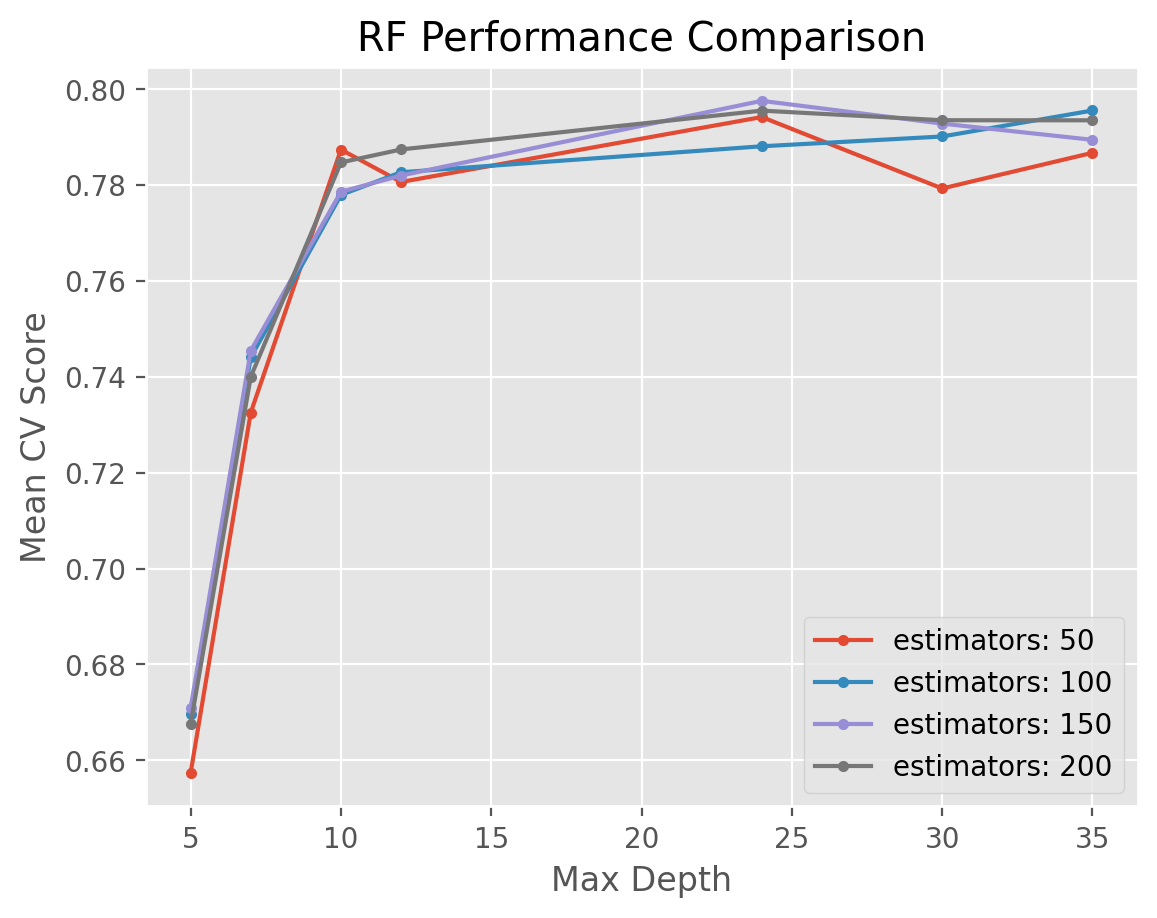

In [116]:
for i in results_pipe_RF_fs['rf__n_estimators'].unique():
    temp = results_pipe_RF_fs[results_pipe_RF_fs['rf__n_estimators'] == i]
    plt.plot(temp['rf__max_depth'], temp['test_score'], marker = '.', label = 'estimators: ' + str(i))
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("RF Performance Comparison")
plt.show()

## Performance Comparison <a id='Mod-Comp'></a>

To evaluate the performance of each tunning methods, we employ cross-validation, which is a random process. We will use Paired T-test to assess which method is statiscally significant compared to others at 95% significance level. 


Our next step is to fit each tunning method on the testing data in a cross-validated fashion in order to find out the best tuning methods. We will start by  doing strtified cross validation with 10 splits on each tune classifier and then we will conduct a paired t-test for the Accuracy score between classifers.

### K-Nearest Neighbor Tuning

In [117]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN_fs.best_estimator_,
                                 X=D_test_fs,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='accuracy')
cv_results_KNN.mean()

0.7191964285714286

### Gaussian NB Tuning

In [74]:
D_test_transformed = PowerTransformer().fit_transform(D_test_fs)

cv_results_NB = cross_val_score(estimator=gs_pipe_NB_fs.best_estimator_,
                                X=D_test_transformed ,
                                y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='accuracy')
cv_results_NB.mean()

0.5553571428571429

### Decision Tree Tuning

In [75]:
cv_results_DT = cross_val_score(estimator=gs_pipe_DT_fs.best_estimator_,
                                X=D_test_fs,
                                y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='accuracy')
cv_results_DT.mean()

0.6765625

### Random Forest Tuning

In [76]:
cv_results_RF = cross_val_score(estimator=gs_pipe_RF_fs.best_estimator_,
                                 X=D_test_fs,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='accuracy')
cv_results_RF.mean()

0.7838293650793651

It is clear to see that Random Forest Tuning, which has Accuracy score of 0.784, has  outperformed others. We then conduct paired t-test to confirm whether this outperformace is statistically significant. 

In [118]:
from scipy import stats

# RF seems to be the best, so let's compare that to the others
# any p-value < 0.05 indicates a statistically significant result

print(stats.ttest_rel(cv_results_RF, cv_results_KNN))
print(stats.ttest_rel(cv_results_RF, cv_results_DT))
print(stats.ttest_rel(cv_results_RF, cv_results_NB))

TtestResult(statistic=5.602575389960682, pvalue=0.0003331726308710224, df=9)
TtestResult(statistic=8.194278338527198, pvalue=1.8264234497521993e-05, df=9)
TtestResult(statistic=12.43365173553589, pvalue=5.687357577376322e-07, df=9)


Now, you can observe that with degree of freedom = 9, all the p-value is uncer 0.05, indicating that the outperformance of Random Forest Tuning is confirmed. We can say that there is enough evidence to conclude that Random Forest Tuning is statiscally the best model at 95% significance level when using test data. 

### Prediction and Evaluation

At this stage, we will do prediction using Testing Data with 9 selected important features. And then, we will compare with target feature in the test data by observing classification report and confusion matrix.

In [120]:
# K-Nearest Neighbor prediction on Testing data
pred_KNN = gs_pipe_KNN_fs.predict(D_test_fs)

In [121]:
# NB prediction on Testing data
D_test_transformed = PowerTransformer().fit_transform(D_test_fs)
pred_NB = gs_pipe_NB_fs.predict(D_test_transformed)

In [122]:
# Decision Tree prediction on Testing data
pred_DT = gs_pipe_DT_fs.predict(D_test_fs)

In [123]:
#Random Forest prediction on Testing data
pred_RF = gs_pipe_RF_fs.predict(D_test_fs)

In [124]:
from sklearn import metrics
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(t_test, pred_KNN))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(t_test, pred_NB))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(t_test, pred_DT))
print("\nClassification report for Random Forest ") 
print(metrics.classification_report(t_test, pred_DT))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        88
           1       0.64      0.51      0.57        92
           2       0.74      0.77      0.75       111
           3       0.86      0.86      0.86        91
           4       0.97      1.00      0.99       102
           5       0.63      0.62      0.63        74
           6       0.60      0.68      0.64        76

    accuracy                           0.77       634
   macro avg       0.75      0.76      0.75       634
weighted avg       0.76      0.77      0.76       634


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        88
           1       0.45      0.33      0.38        92
           2       0.40      0.49      0.44       111
           3       0.45      0.93      0.61        91
           4       0.94      1.00      0.97    

Accoring to the Classification Report of 4 Classifier, The recall of Random Forest and Decision Tree are the same, while Naive Bayes is the worst. The recall here is true postitive rate, which means the ability to correctly predict obesity level of a classifier. If you are a doctor or a nutritionist, you would select recall as the performance metric. Because recall values will help them predict obesity level of a patient better based on their physical activity and eating habits. 

In [83]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(t_test, pred_KNN))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(t_test, pred_NB))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(t_test, pred_DT))
print("\nConfusion matrix for Random Forest") 
print(metrics.confusion_matrix(t_test, pred_DT))


Confusion matrix for K-Nearest Neighbor
[[ 76   7   1   0   0   2   2]
 [ 10  47  13   1   2   8  11]
 [  2   2  85   4   0   7  11]
 [  0   4   1  78   0   4   4]
 [  0   0   0   0 102   0   0]
 [  1   6   8   6   1  46   6]
 [  1   8   7   2   0   6  52]]

Confusion matrix for Naive Bayes
[[ 44  12  20   4   0   8   0]
 [ 26  30  15   4   0  12   5]
 [  0   2  54  48   2   1   4]
 [  0   3   1  85   0   0   2]
 [  0   0   0   0 102   0   0]
 [  6  14  24  18   4   7   1]
 [  1   6  21  29   0   3  16]]

Confusion matrix for Decision Tree
[[ 72   7   1   0   0   7   1]
 [ 13  57   5   1   1   6   9]
 [  3   3  82   2   1   5  15]
 [  0   3   2  80   0   1   5]
 [  0   0   0   0 102   0   0]
 [  2   6   5   0   0  58   3]
 [  1   9   7   5   0   5  49]]

Confusion matrix for Random Forest
[[ 72   7   1   0   0   7   1]
 [ 13  57   5   1   1   6   9]
 [  3   3  82   2   1   5  15]
 [  0   3   2  80   0   1   5]
 [  0   0   0   0 102   0   0]
 [  2   6   5   0   0  58   3]
 [  1   9   7

As you can see, the confusion matric of Dicision Tree and Random Forest are very similar. According to confusion matrix table of 4 classifier, we can see K-Nearest Neighbor can predict 'Normal_weight' level better than other, while Naive Bayes have the lowest prediction of Normal Weight. All Classifier can predict 'insufficient weight' correctly. We will not use Naive Bayes to predict 'obesity_level II' and 'obesity_level III' as they made more mistakes than others models. In general, Decision Tree and Random Forest classifiers have higher true possitive rates than Decision Tree Classifier and K-Nearest Neighbor. The result of confusion matrix is supportive for classification reports.

## Critique and Limitation <a id='Crit-and-Lim'></a>

We have some weakness while doing modelling as we do raw predictive performance over interpretablility. Therefore, we should do more analysis before performing modelling as well as feature selection and ranking process and hyper-parameter tuning. 

Secondly, our dataset is not big enough which result in not highly accurate predictions. As you can see our prediction have the low mean score , which will not lead the better decision-making and planning.

Thirdly, we did not rake dummy feature into account when doing power transformation in Gaussian Naive Bayes step, which is the main reason of the NB model poor performance on the test set. In addition, we also did not consider about bias in dataset and other factors such as auto-correlation, linearity of independent variables and response variables. 

Next, Random Forest classifier has performed more efficient than other classifiers so we can improve its performance by increasing number of trees, controlling maximum depth of each tree, rising minimum sample split, optimizing number of features. 

Finally, during building model using hyper-parameter tuning methods, we only use 9 important features, selected by performing spFSR feature selection. This also reduce the performance and prediction of classifiers. Each tunning methods and classifier should have different number of important features, which works best for each classifier. 

## Project Summary <a id='Pro-Sum'></a>

Accuracy predicting healthcare will help obese people have more chances to prevent the worst scenario while helping the healthcare system give proper treatment to overcome the situation. We aim to enhance the model's predictive accuracy to determine obesity levels, facilitating improved preventative measures and treatment approaches in healthcare. In the first phase of our project, we concentrated on data preprocessing and cleaning. Our preliminary analysis revealed several notable trends: a predominant prevalence of overweight and obesity conditions within the population studied, regular water consumption paired with occasional alcohol intake, and a significant lack of physical activity. Notably, the usage of electronic devices emerged as a potential risk factor for obesity among individuals aged 20-30. In the second phase, after testing and comparing the models, we found that Random Forest (RF) outperformed K-Nearest Neighbors (KNN), Naive Bayes (NB), and Decision Tree (DT) in predicting obesity levels, with the highest mean cross-validation accuracy (0.789). The performance improvement of Random Forest over other models was statistically significant, with p-values indicating strong evidence against the null hypothesis of equal performance. The classification reports and confusion matrices revealed that Random Forest provided the most balanced and accurate predictions across different classes of obesity levels. Based on the findings, Random Forest should be used to predict obesity levels in this dataset due to its superior accuracy and reliability. We believe that our project achieved its goal of finding the best prediction model to help in the fight against obesity

## Summary of Findings <a id='Sum-Fin'></a>

The models included K-Nearest Neighbors (KNN), Naive Bayes (NB), Decision Tree (DT), and Random Forest (RF). The performance of each model was evaluated using cross-validation and their respective classification reports and confusion matrices. Here is a summary of their results:

##### Cross-Validation Results

* K-Nearest Neighbors (KNN): 0.719

* Naive Bayes (NB): 0.554

* Decision Tree (DT): 0.677

* Random Forest (RF): 0.789

All comparisons yielded p-values less than 0.05, indicating statistically significant differences between RF and the other models:

* RF vs. KNN: p-value = 0.0003659243056478916

* RF vs. DT: p-value = 1.507761398626335e-05

* RF vs. NB: p-value = 5.26254108375122e-07

##### Classification Reports and Confusion Matrices

* K-Nearest Neighbors (KNN):

Overall accuracy: 0.77

Precision, recall, and F1-score varied across different obesity levels, with some classes having lower scores.

* Naive Bayes (NB):

Overall accuracy: 0.79

Precision, recall, and F1-score were generally lower, with some classes performing poorly.

* Decision Tree (DT):

Overall accuracy: Not explicitly stated, but implied to be lower than RF.

Precision, recall, and F1-score varied, similar to KNN.

* Random Forest (RF):

Overall accuracy: Highest among all models.

Consistently higher precision, recall, and F1-score across different obesity levels.









## Conclusion <a id='Conc'></a>

The study successfully identified the most effective model for predicting obesity levels, achieving its primary aim. Among the evaluated models, Random Forest emerged as the best-performing model due to its highest accuracy and robust performance across various obesity categories. 

Therefore, for predicting obesity levels in individuals from Mexico, Peru, and Colombia based on the given dataset, Random Forest is recommended as the optimal model. This model's ability to handle diverse features and complex relationships within the data makes it ideal this predictive task. The findings underscore the effectiveness of ensemble methods like Random Forest in providing accurate and reliable predictions for obesity levels.

## References <a id='References'></a>

MEHRPARVAR, F. (2023), April 😎. Obesity Levels. Www.kaggle.com. https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels/data